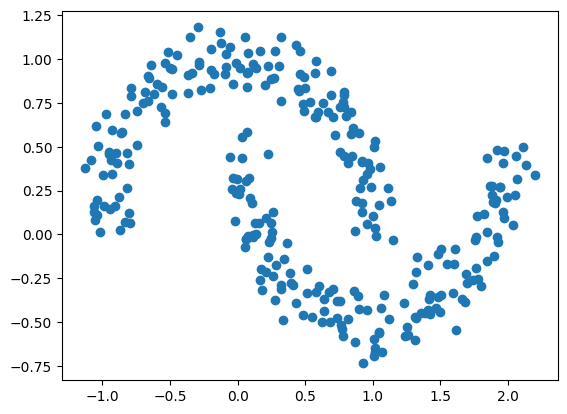

In [173]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
import numpy as np
n = 300
# X, y = datasets.make_blobs(n_samples=n, centers=4, cluster_std=0.60, random_state=0)
# clustering = DBSCAN(eps=0.5, min_samples=3).fit(X) #blobs
X, y = datasets.make_moons(n_samples=n, noise=0.1)
clustering = DBSCAN(eps=0.15, min_samples=3).fit(X) #moons
# X, y = datasets.make_circles(n_samples=n, noise=0.1, factor=0.5)
# clustering = DBSCAN(eps=0.16, min_samples=2).fit(X) #circles
# X, y = np.random.rand(n, 2), None
# clustering = DBSCAN(eps=0.05, min_samples=2).fit(X) #random
plt.scatter(X[:, 0], X[:, 1]) # , s=50
plt.show()

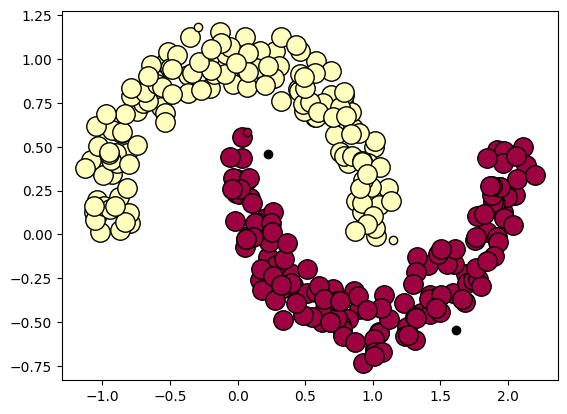

In [174]:
unique_labels = set(clustering.labels_)
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = clustering.labels_ == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
    
plt.show()